In [1]:
# Business understanding
# Data understanding
# Data preparation
# Modeling
# Evaluation
# /49864_274957_bundle_archive/googleplaystore.csv

In [528]:
import pandas as pd
import numpy as np
# import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

%matplotlib inline
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [529]:
df = pd.read_csv('49864_274957_bundle_archive/googleplaystore.csv')

# Inspection 👀

In [530]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [531]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


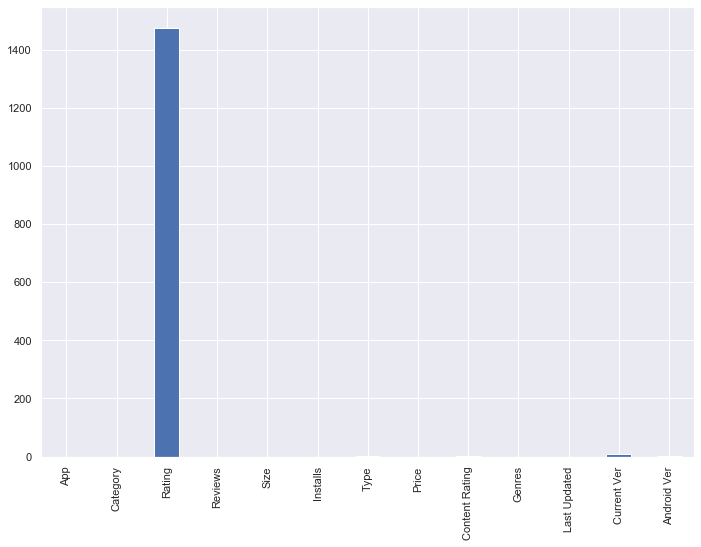

In [532]:
df.isna().sum().plot.bar();

In [533]:
df[df['Size'] == 'Varies with device'].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,"5,000,000+",Free,0,Everyone,Art & Design,"July 14, 2018",Varies with device,2.3.3 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,Varies with device,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,Varies with device,"5,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
68,REPUVE,AUTO_AND_VEHICLES,3.9,356,Varies with device,"100,000+",Free,0,Everyone,Auto & Vehicles,"May 25, 2018",Varies with device,Varies with device


In [534]:
len(df[df['Size'] == 'Varies with device']) / len(df)

0.15635089013928605

# Springcleaning 🧹

In [535]:
def clean_size(string):
    
    '''
    func standarises storage units and excludes 'Varies with device'
    INPUT: string - storage units include M, k and 'Varies with device'
    OUTPUT: float
    
    '''
    
    if string == 'Varies with device':
        num = np.nan
    elif string[-1] == 'M':
        num = float(string.split('M')[0])
    elif string[-1] == 'k':
        num = float(string.split('k')[0]) * 0.001
    else:
        num = np.nan
    return num

In [536]:
def clean_installs(string):
    
    '''
    func removes '+' symbol from string objects
    
    '''
    
    if len(string) > 0:
        string = string[:-1].replace(',', '')
        return (string)
    else:
        pass

In [537]:
def clean_price(string):
    
    '''
    func removes '$' symbol from string objects

    '''
    try:
        return float(string.replace('$', ''))
    except ValueError:
        return np.nan

In [538]:
def clean_date(string):
    
    '''
    func converts string object to date
    INPUT: string with strptime format '%B %d %Y'
    OUTPUT: datetime object
    
    '''
    try:
        string = string.replace(',','')
        date_time_str = string
        date_time_obj = dt.strptime(date_time_str, '%B %d %Y')
        return date_time_obj
    except ValueError:
        return np.nan

In [539]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [540]:
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

In [541]:
df['Size'] = df['Size'].apply(clean_size)

In [542]:
df['Installs'] = df['Installs'].apply(clean_installs)

In [543]:
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

In [544]:
df['Price'] = df['Price'].apply(clean_price)

In [545]:
df['Last Updated'] = df['Last Updated'].apply(clean_date)

In [546]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')

In [547]:
df['Rating'] = pd.to_numeric(df['Rating'])

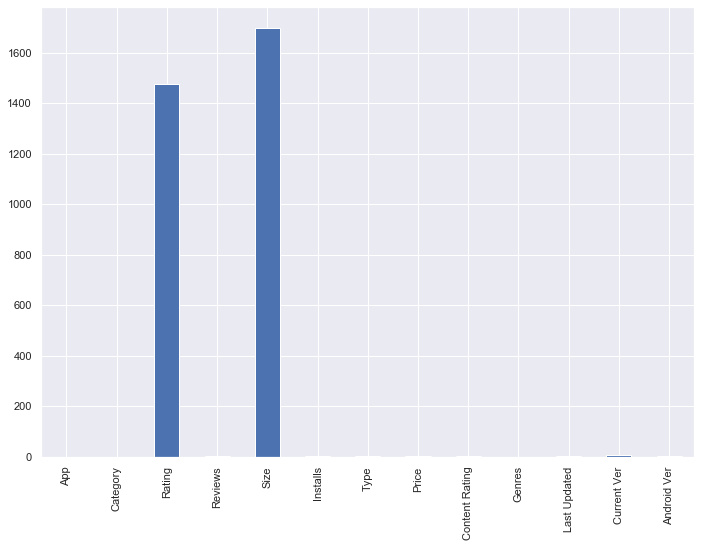

In [548]:
df.isna().sum().plot.bar();

In [549]:
df['Size'].fillna(df.groupby('Category')['Size'].transform('mean'),inplace = True)

In [550]:
df.dropna(axis=0, inplace=True)

In [551]:
df.reset_index(inplace=True, drop=True)

In [552]:
df.shape

(9360, 13)

# Explore 🧭

In [553]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [554]:
df['Last Updated'].sort_values(ascending=True).head()

6681   2010-05-21
6641   2011-01-30
8973   2011-03-16
7451   2011-04-11
7192   2011-04-16
Name: Last Updated, dtype: datetime64[ns]

In [555]:
df['Last Updated'].sort_values(ascending=True).tail()

9266   2018-08-08
9060   2018-08-08
8905   2018-08-08
9305   2018-08-08
9272   2018-08-08
Name: Last Updated, dtype: datetime64[ns]

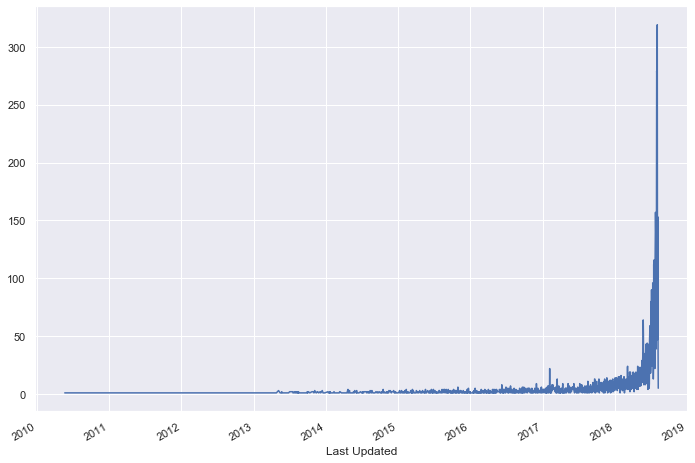

In [556]:
df['Last Updated'].groupby(df['Last Updated']).count().plot();

In [557]:
df['Last Updated Year'] = df['Last Updated'].dt.year

In [558]:
df['Last Updated Year'].value_counts()

2018    6504
2017    1497
2016     651
2015     388
2014     190
2013      93
2012      21
2011      15
2010       1
Name: Last Updated Year, dtype: int64

In [559]:
month_count = df['Last Updated'].dt.month.value_counts().reset_index().sort_values('index')

In [560]:
month_count.columns = ['month_index', 'Last Updated']

In [561]:
month_count = month_count.reset_index()

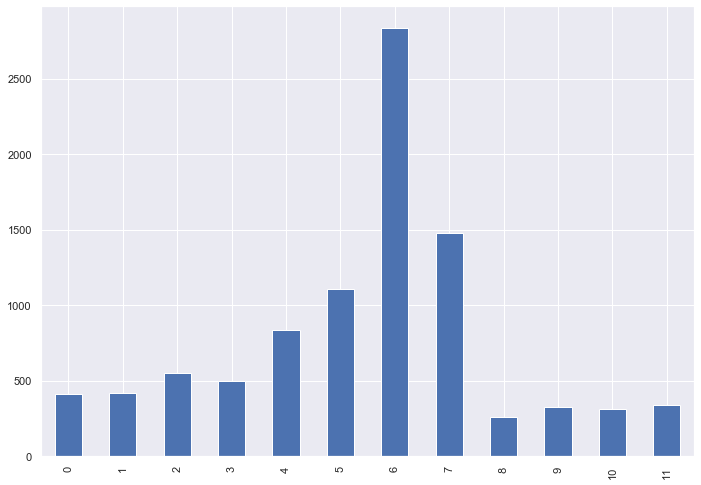

In [562]:
month_count['Last Updated'].plot.bar();

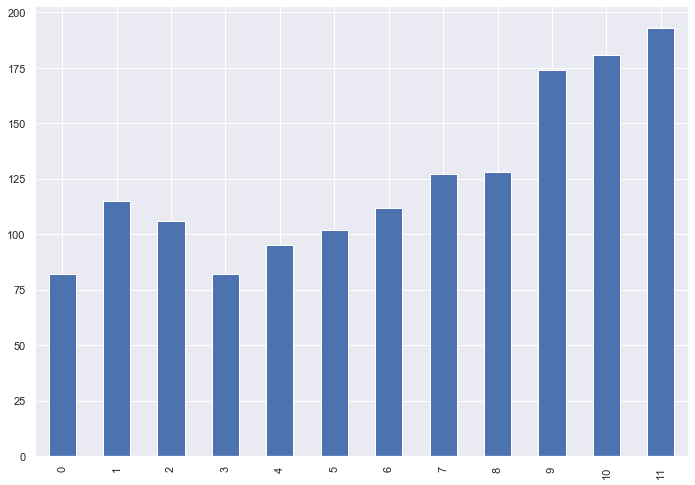

In [563]:
df[df['Last Updated Year'] == 2017]['Last Updated']\
.dt.month.value_counts().reset_index().sort_values('index').reset_index()['Last Updated'].plot.bar();

In [564]:
# Most app last updates occured in July followed by August and June.
# Although there's seems to be a strong bias perhaps from when the dataset was scraped
# If we consider the year 2017 the monthly distribution is skewed towards the left with most updates
# having occured within the last three months of the year

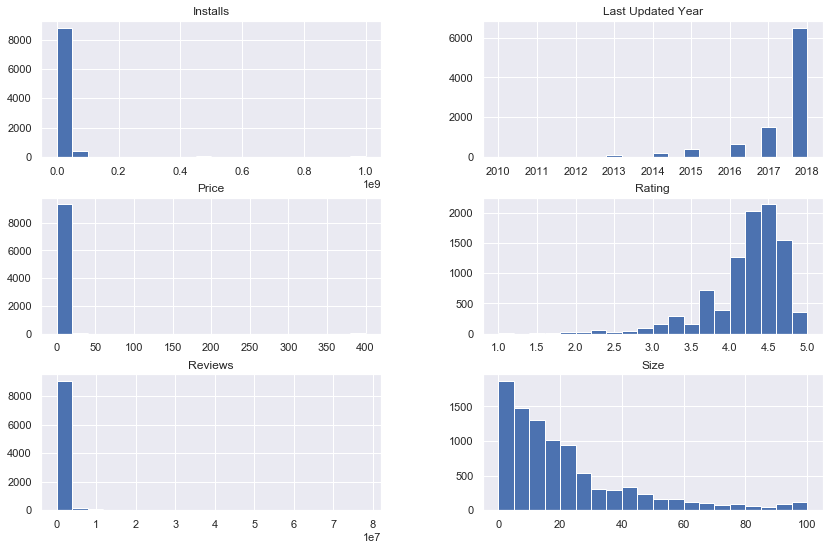

In [565]:
df.hist(bins=20);

fig = plt.gcf()
fig.set_size_inches(14, 9)

In [566]:
# When looking at our data distribution of our non-categorical columns, most columns are right skewed
# with a long tail extending towards the right. In particular, Installs, Price and Reviews seem to have a couple
# extreme outliers

In [567]:
# Inspecting the price of Google Playstore apps, most - as expected - are free.

In [568]:
# The most expensive apps are variations of the "I Am Rich" app which is priced at the store's maximum

In [569]:
df.sort_values('Price', ascending=False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last Updated Year
4194,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,7.300,10000.0,Paid,400.00,Everyone,Lifestyle,2018-05-03,1.0.1,4.1 and up,2018
5060,I am Rich,FINANCE,4.3,180.0,3.800,5000.0,Paid,399.99,Everyone,Finance,2018-03-22,1.0,4.2 and up,2018
4036,most expensive app (H),FAMILY,4.3,6.0,1.500,100.0,Paid,399.99,Everyone,Entertainment,2018-07-16,1.0,7.0 and up,2018
5055,I am rich (Most expensive app),FINANCE,4.1,129.0,2.700,1000.0,Paid,399.99,Teen,Finance,2017-12-06,2,4.0.3 and up,2017
5064,I AM RICH PRO PLUS,FINANCE,4.0,36.0,41.000,1000.0,Paid,399.99,Everyone,Finance,2018-06-25,1.0.2,4.1 and up,2018
5053,I Am Rich Pro,FAMILY,4.4,201.0,2.700,5000.0,Paid,399.99,Everyone,Entertainment,2017-05-30,1.54,1.6 and up,2017
5050,I am rich(premium),FINANCE,3.5,472.0,0.965,5000.0,Paid,399.99,Everyone,Finance,2017-05-01,3.4,4.4 and up,2017
4189,💎 I'm rich,LIFESTYLE,3.8,718.0,26.000,10000.0,Paid,399.99,Everyone,Lifestyle,2018-03-11,1.0.0,4.4 and up,2018
5049,I am Rich!,FINANCE,3.8,93.0,22.000,1000.0,Paid,399.99,Everyone,Finance,2017-12-11,1.0,4.1 and up,2017
5047,I Am Rich Premium,FINANCE,4.1,1867.0,4.700,50000.0,Paid,399.99,Everyone,Finance,2017-11-12,1.6,4.0 and up,2017


In [570]:
# How many apps actually contain the word rich

In [571]:
rich_df = df[(df['App'].str.contains('Rich', case=False)) & (df['Type'] == 'Paid')]

In [572]:
rich_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 2089 to 5064
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   App                18 non-null     object        
 1   Category           18 non-null     object        
 2   Rating             18 non-null     float64       
 3   Reviews            18 non-null     float64       
 4   Size               18 non-null     float64       
 5   Installs           18 non-null     float64       
 6   Type               18 non-null     object        
 7   Price              18 non-null     float64       
 8   Content Rating     18 non-null     object        
 9   Genres             18 non-null     object        
 10  Last Updated       18 non-null     datetime64[ns]
 11  Current Ver        18 non-null     object        
 12  Android Ver        18 non-null     object        
 13  Last Updated Year  18 non-null     int64         
dtypes: date

In [573]:
rich_df.sort_values('Installs', ascending=False).head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last Updated Year
5042,I am rich,LIFESTYLE,3.8,3547.0,1.8,100000.0,Paid,399.99,Everyone,Lifestyle,2018-01-12,2.0,4.0.3 and up,2018
5047,I Am Rich Premium,FINANCE,4.1,1867.0,4.7,50000.0,Paid,399.99,Everyone,Finance,2017-11-12,1.6,4.0 and up,2017
4194,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,7.3,10000.0,Paid,400.00,Everyone,Lifestyle,2018-05-03,1.0.1,4.1 and up,2018
5045,I am Rich Plus,FAMILY,4.0,856.0,8.7,10000.0,Paid,399.99,Everyone,Entertainment,2018-05-19,3.0,4.4 and up,2018
5046,I am rich VIP,LIFESTYLE,3.8,411.0,2.6,10000.0,Paid,299.99,Everyone,Lifestyle,2018-07-21,1.1.1,4.3 and up,2018


In [574]:
# The app with the most installs is "I am rich". With over 100,000 people who have paid 399 USD, the developer
# made at least 39,900,000 USD

In [575]:
# Interestingly, the app has a Rating of 3.8, which is only slightly below the average Rating.
# It's also the smallest app of the 'I am rich' app category

In [576]:
# The Rating column is the only column left skewed

In [577]:
df['Rating'].mode()

0    4.4
dtype: float64

In [578]:
df['Rating'].mean()

4.191837606837606

In [579]:
df[df['Rating'] == 1.0].sort_values('Reviews')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last Updated Year
602,House party - live chat,DATING,1.0,1.0,9.2,10.0,Free,0.00,Mature 17+,Dating,2018-07-31,3.52,4.0.3 and up,2018
3971,Speech Therapy: F,FAMILY,1.0,1.0,16.0,10.0,Paid,2.99,Everyone,Education,2016-10-07,1.0,2.3.3 and up,2016
4898,Clarksburg AH,MEDICAL,1.0,1.0,28.0,50.0,Free,0.00,Everyone,Medical,2017-05-01,300000.0.81,4.0.3 and up,2017
5583,Truck Driving Test Class 3 BC,FAMILY,1.0,1.0,2.0,50.0,Paid,1.49,Everyone,Education,2012-04-09,1.0,2.1 and up,2012
5860,BJ Bridge Standard American 2018,GAME,1.0,1.0,4.9,1000.0,Free,0.00,Everyone,Card,2018-05-21,6.2-sayc,4.0 and up,2018
5983,MbH BM,MEDICAL,1.0,1.0,2.3,100.0,Free,0.00,Everyone,Medical,2016-12-14,1.1.3,4.3 and up,2016
6609,Thistletown CI,PRODUCTIVITY,1.0,1.0,6.6,100.0,Free,0.00,Everyone,Productivity,2018-03-15,41.9,4.1 and up,2018
6954,CR Magazine,BUSINESS,1.0,1.0,7.8,100.0,Free,0.00,Everyone,Business,2014-07-23,2.4.2,2.3.3 and up,2014
7843,DT future1 cam,TOOLS,1.0,1.0,24.0,50.0,Free,0.00,Everyone,Tools,2018-03-27,3.1,2.2 and up,2018
7058,Tech CU Card Manager,FINANCE,1.0,2.0,7.2,1000.0,Free,0.00,Everyone,Finance,2017-07-25,1.0.1,4.0 and up,2017


In [580]:
df[df['Reviews'] > 100].sort_values('Rating').head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last Updated Year
6122,Pick-a-Paint,LIFESTYLE,1.6,242.0,36.0,50000.0,Free,0.0,Everyone,Lifestyle,2018-05-14,1.2.1,3.0 and up,2018
4698,AC REMOTE UNIVERSAL-PRO,FAMILY,1.6,402.0,1.7,100000.0,Free,0.0,Everyone,Entertainment,2015-12-11,1.0,2.2 and up,2015
8086,EB Mobile,FAMILY,1.7,1172.0,5.6,10000.0,Free,0.0,Everyone,Education,2017-10-09,1.1.2,4.1 and up,2017
7121,CW TV,NEWS_AND_MAGAZINES,1.7,367.0,6.1,50000.0,Free,0.0,Everyone,News & Magazines,2018-03-02,1.7,4.0 and up,2018
3850,C by GE,LIFESTYLE,1.7,686.0,6.6,10000.0,Free,0.0,Everyone,Lifestyle,2018-07-11,4.1.07,4.3 and up,2018


In [581]:
corr = df.corr().sort_values('Rating', ascending=False)
corr.style.background_gradient(cmap='coolwarm')

,Rating,Reviews,Size,Installs,Price,Last Updated Year
Rating,1.000000,0.068133,0.078849,0.051337,-0.021919,0.137871
Last Updated Year,0.137871,0.078321,0.199098,0.092689,-0.003406,1.000000
Size,0.078849,0.113105,1.000000,0.050721,-0.024456,0.199098
Reviews,0.068133,1.000000,0.113105,0.641605,-0.009824,0.078321
Installs,0.051337,0.641605,0.050721,1.000000,-0.011895,0.092689
Price,-0.021919,-0.009824,-0.024456,-0.011895,1.000000,-0.003406


In [582]:
# Size has the biggest correlation with our Rating column
# We can see the correlation in our data distribution as well
# with both columns sharing similar distribution shapes

/Users/jacques/opt/anaconda3/envs/data-sci/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning:

invalid value encountered in true_divide

/Users/jacques/opt/anaconda3/envs/data-sci/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars



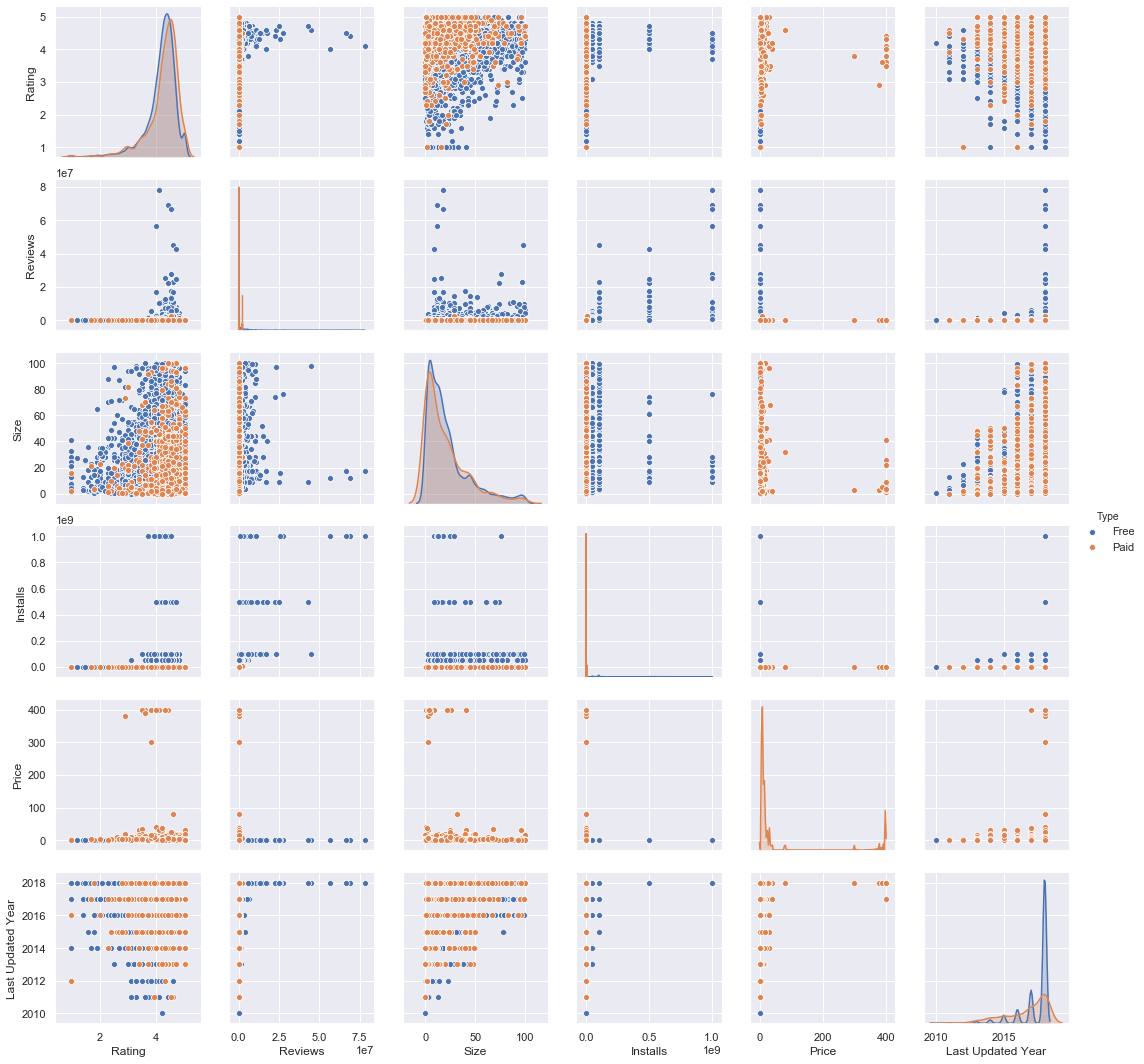

In [583]:
sns.pairplot(df, hue="Type")

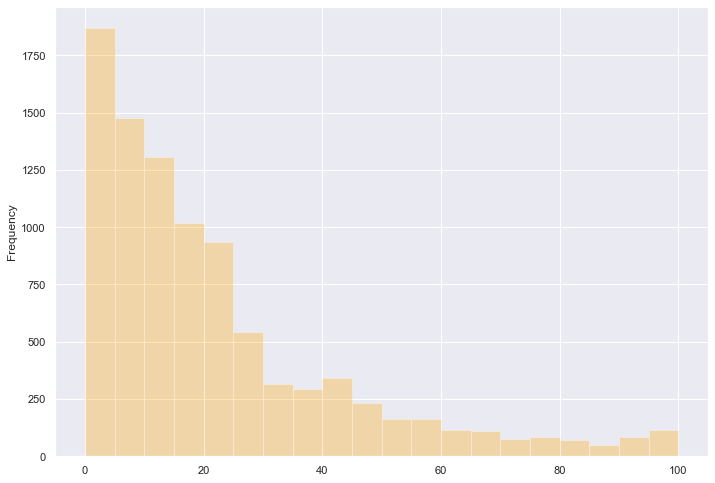

In [584]:
df['Size'].plot.hist(alpha=0.3, color='orange', bins=20);

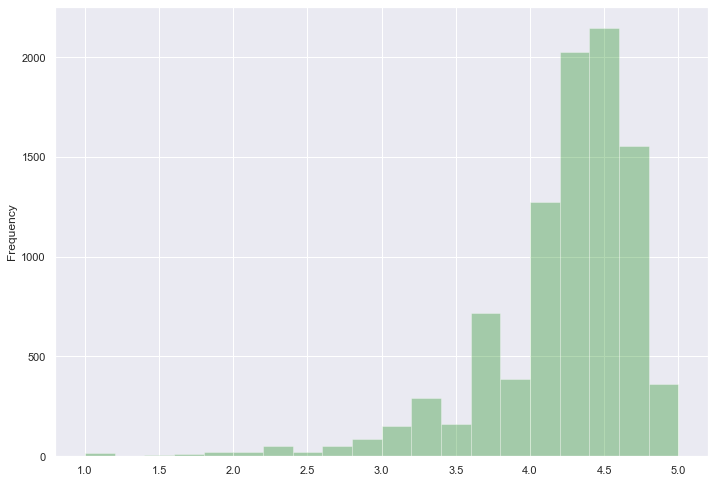

In [585]:
df['Rating'].plot.hist(alpha=0.3, color='green', bins=20);

<Figure size 720x720 with 0 Axes>

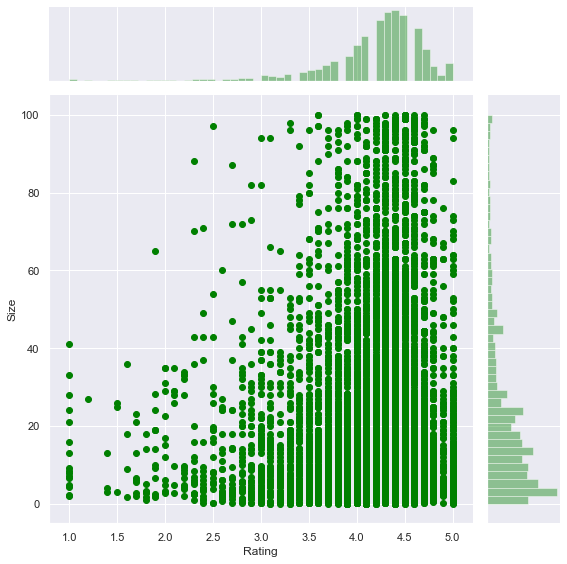

In [586]:
plt.figure(figsize = (10,10))
sns.jointplot(x="Rating", y="Size",color = 'green', data=df, height = 8);

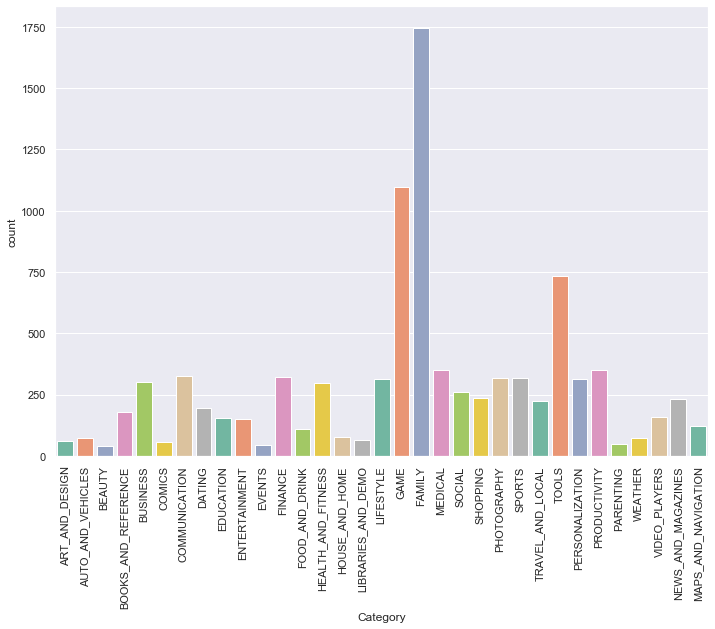

In [721]:
plot = sns.countplot(x="Category",data=df, palette="Set2")
plot.set_xticklabels(g.get_xticklabels(), rotation=90);

In [589]:
df['Rating'].groupby(df['Category']).describe().style\
.bar(color='#FFA07A', subset=['count'], align='zero')\

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
ART_AND_DESIGN,61.000000,4.377049,0.328326,3.400000,4.100000,4.400000,4.700000,5.000000
AUTO_AND_VEHICLES,73.000000,4.190411,0.543692,2.100000,4.000000,4.300000,4.600000,4.900000
BEAUTY,42.000000,4.278571,0.362603,3.100000,4.000000,4.300000,4.575000,4.900000
BOOKS_AND_REFERENCE,178.000000,4.346067,0.429046,2.700000,4.100000,4.500000,4.600000,5.000000
BUSINESS,303.000000,4.121452,0.624422,1.000000,3.900000,4.300000,4.500000,5.000000
COMICS,58.000000,4.155172,0.537758,2.800000,3.825000,4.400000,4.500000,5.000000
COMMUNICATION,328.000000,4.158537,0.426192,1.000000,4.000000,4.300000,4.400000,5.000000
DATING,195.000000,3.970769,0.630510,1.000000,3.700000,4.100000,4.400000,5.000000
EDUCATION,155.000000,4.389032,0.251894,3.500000,4.200000,4.400000,4.600000,4.900000


In [715]:
def get_cat_ratings_chart(column_cat):
    
    '''
    This function provides a stacked percentage bar chart by app ratings given input category
    
    INPUT: column category of df
    OUTPUT: plotly html embedded figure
    
    '''
    
    cats = list(df[df['Ratings Rounded'] == 5].groupby(df[column_cat]).count()['App'].reset_index()[column_cat])
    
    gdf = pd.DataFrame()
    
    gdf['Ratings Rounded'] = [1.0, 2.0, 3.0, 4.0, 5.0]
    
    dfs = []

    dfs.append(gdf)

    for i in cats:

        count_df = df[df[column_cat] == i].groupby(df['Ratings Rounded']).count()['App'].reset_index()
        count_df.columns = ['Ratings Rounded', 'App Count']

        dfs.append(count_df)
        
    cat_df = functools.reduce(lambda left, right: pd.merge(left, right, on='Ratings Rounded', how='left'), dfs)
    cat_df = cat_df.set_index('Ratings Rounded', drop=True)
    cat_df.columns = cats
    cat_df = cat_df.fillna(0)
    
    for label in cat_df.columns:
        cat_df[label] = round((cat_df[label]/cat_df[label].sum())*100, 2)
        
    animals=list(cat_df.columns)

    data = []

    for row in range(0, len(list(cat_df.index))):    
        data.append(go.Bar(name=row+1,
                           x=animals,
                           y=cat_df.iloc[row],
                           text=cat_df.iloc[row],
                           textposition='auto'))

    fig = go.Figure(data=data)

    # Change the bar mode
    fig.update_layout(barmode='stack', title_text='Rating distribution by %s' % column_cat)
    fig.show()

In [720]:
get_cat_ratings_chart('Last Updated Year')

In [726]:
get_cat_ratings_chart('Category')

In [727]:
get_cat_ratings_chart('Type')

In [53]:
from sklearn.model_selection import train_test_split

def split_clean_data(df, y_col, drop_cols = None):
    
    '''
    INPUT
    df - pandas dataframe
    y_col - pandas series name (string) to predict
    drop_cols - list of pandas series names (strings) to drop and exclude (optional)
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    Perform to obtain the correct X and y objects
    This function cleans df using the following steps to produce X and y:
    '''
    
    # Drop rows with missing salary values
    df = df.dropna(subset=[y_col], axis=0)
    y = df[y_col]
    
    #Drop respondent and expected salary columns
    if drop_cols is not None:
        df.drop(drop_cols, axis=1, inplace=True)
    else:
        pass
    
    df.drop(y_col, axis=1, inplace=True)
    
    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)
        
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    X = df
    
    return X, y

#Use the function to create X and y
X, y = split_clean_data(df, y_col='Rating')

# use case example - create train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [54]:
# Size has the biggest correlation with our Rating column
# We can see the correlation in our data distribution as well
# with both columns sharing similar distribution shapes

In [57]:
# Looking at our correlation table, the 